In [1]:
# ===== SENTIMENT ANALYSIS (MINIMAL & SAFE) =====

from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

texts = [
    "I love this product",
    "This is the worst experience",
    "The movie was okay",
    "Absolutely horrible service"
]

results = sentiment_pipeline(texts)

for text, res in zip(texts, results):
    print(f"{text} -> {res['label']} ({res['score']:.2f})")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

C:\Users\shaik\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shaik\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


I love this product -> POSITIVE (1.00)
This is the worst experience -> NEGATIVE (1.00)
The movie was okay -> POSITIVE (1.00)
Absolutely horrible service -> NEGATIVE (1.00)


Torch version: 2.9.1+cpu


Device set to use cpu



Sentiment Results:
      label     score
0  POSITIVE  0.999886
1  NEGATIVE  0.999786
2  POSITIVE  0.998510
3  NEGATIVE  0.999669


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


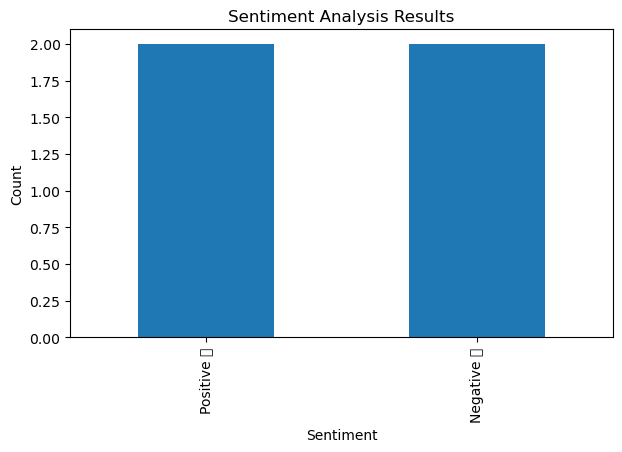


Live Test:
Text: This project is finally working perfectly!
Prediction: POSITIVE (99.99%)


In [3]:
# ======================================
# SENTIMENT ANALYSIS PROJECT (FINAL)
# ======================================

import torch
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

print("Torch version:", torch.__version__)

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# Sample data
texts = [
    "I love this product!",
    "This is the worst service ever.",
    "The movie was okay, not bad.",
    "Absolutely horrible experience."
]

# Predict sentiments
results = sentiment_pipeline(texts)

# Convert to DataFrame
df = pd.DataFrame(results)
print("\nSentiment Results:")
print(df)

# Beautify labels
df["label"] = df["label"].map({
    "POSITIVE": "Positive 👍",
    "NEGATIVE": "Negative 👎"
})

# Plot results
plt.figure(figsize=(7,4))
df["label"].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Live test
user_text = "This project is finally working perfectly!"
prediction = sentiment_pipeline(user_text)[0]

print("\nLive Test:")
print(f"Text: {user_text}")
print(f"Prediction: {prediction['label']} ({prediction['score']:.2%})")